In [1]:
import numpy as np
import matplotlib.pyplot as plt

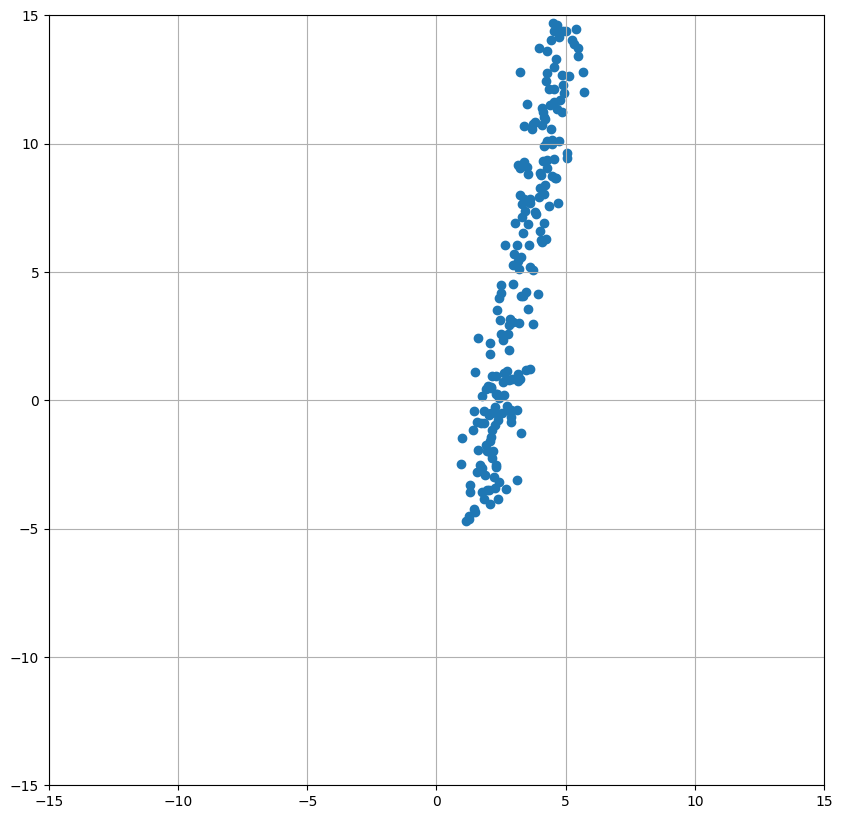

In [2]:
# Generate some data
Npoints = 200
data = np.hstack( ( (np.random.rand(Npoints,1)-0.5)*20, (np.random.randn(Npoints,1)-0.5)*0.5 ) )

alpha = 80 / 180.0 * np.pi
R = np.array( [ [np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)] ] )

data = data@R.T + np.array( [3.0,5.0])

plt.figure(figsize=(10,10))
plt.scatter( data[:,0], data[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid(True)

[[ 4.52021684]
 [-9.86512379]]


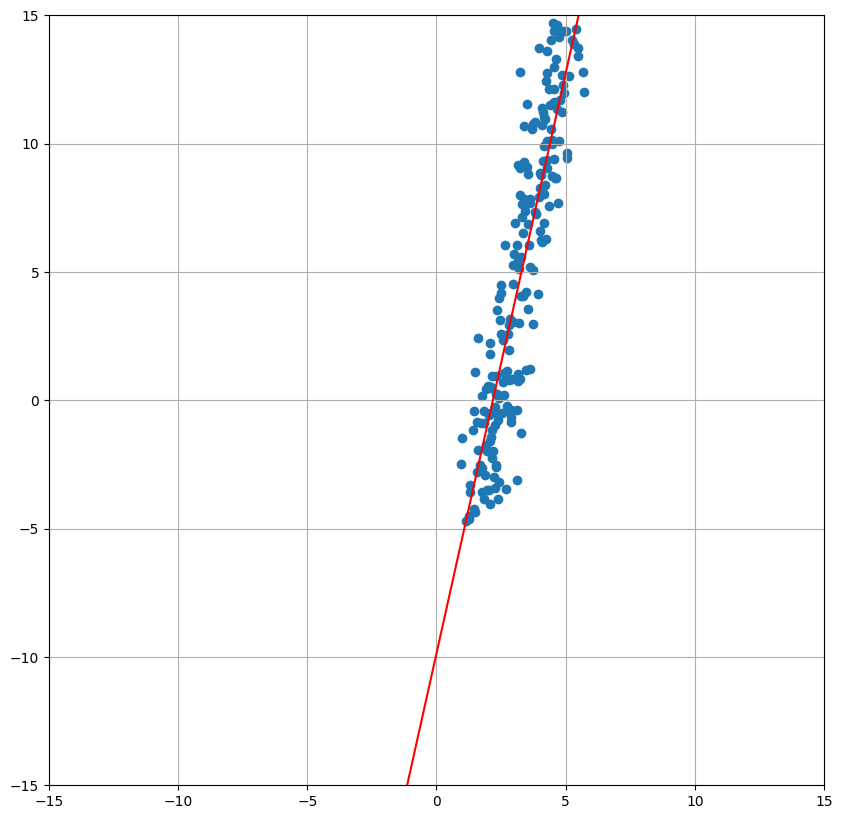

In [3]:
# Simple model fitting

X = np.vstack( (data[:,0], np.ones( (Npoints) )  ) ).T
Y = np.expand_dims( data[:,1], axis=-1)

params = np.linalg.inv( X.T @ X  ) @ X.T @ Y
print(params)

x0 = -15
x1 = 15
y0 = x0 * params[0] + params[1]
y1 = x1 * params[0] + params[1]
plt.figure(figsize=(10,10))
plt.scatter( data[:,0], data[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid(True)
plt.plot([x0,x1],[y0,y1], 'r')


# Point-line distance with implicit line model

\begin{equation*}
\begin{aligned}
        & \underset{a,b,c}{\mbox{argmin}} & \sum_{i=1}^N (ax_i + by_i +c)^2\\
        & \mbox{subject to} & a^2 + b^2 = 1
    \end{aligned}
\end{equation*}

Via Lagrange multipliers we transform the constrained minimization into an unconstrained one:

\begin{equation*}
\begin{pmatrix}
\overline{x^2} & \overline{xy} & \bar{x} \\
\overline{xy} & \overline{y^2} & \bar{y} \\
\bar{x} & \bar{y} & 1
\end{pmatrix}
\begin{pmatrix} a \\ b \\ c \end{pmatrix}
=
\lambda \begin{pmatrix} 2a \\ 2b \\ 0 \end{pmatrix}
\end{equation*}

From which we can observe that the optimum $c$ is $c=-a\bar{x} -b\bar{y}$. Substituting $c$ into the original problem we obtain the Eigenvalue problem:

\begin{equation*}
\begin{pmatrix}
\overline{x^2} - \bar{x}\bar{x} & \overline{xy}-\bar{x}\bar{y} \\
\overline{xy}-\bar{x}\bar{y} & \overline{y^2} - \bar{y}\bar{y} 
\end{pmatrix}
\begin{pmatrix}
a \\ b
\end{pmatrix}
=
\mu \begin{pmatrix} a \\ b \end{pmatrix}
\end{equation*}

Because this is a 2D eigenvalue problem, two solutions up to scale can be obtained in closed form. The scale is obtained from the constraint that $a^2 + b^2 = 1$. The two solutions to this problem are lines at right angles, and one maximises the likelihood and the other minimises it.

## Additional notes

If we translate all the points $(x_i,y_i)$ by $(-\bar{x},-\bar{y})$ the line normal $(a,b)$ remains the same. However, we can easly see that $c=0$ and so such translated line passes through the origin $(0,0)$. In other words, the optimal line passes through the point $(\bar{x}, \bar{y})$ (ie. the centroid of input samples $(x_1,y_1)\ldots(x_N,y_N)$.

So, if we let $x_i'=x_i-\bar{x} \; \forall i$ and $y_i'=y_i-\bar{y} \; \forall i$ (we translate the line so that the centroid of input samples is at the origin) the eigenvalue problem:

\begin{equation*}
\begin{pmatrix}
\overline{x^2} - \bar{x}\bar{x} & \overline{xy}-\bar{x}\bar{y} \\
\overline{xy}-\bar{x}\bar{y} & \overline{y^2} - \bar{y}\bar{y} 
\end{pmatrix}
\begin{pmatrix}
a \\ b
\end{pmatrix}
=
\mu \begin{pmatrix} a \\ b \end{pmatrix}
\end{equation*}

becomes:

\begin{equation*}
\begin{pmatrix}
0 & \overline{x'y'} \\
\overline{x'y'} & 0 
\end{pmatrix}
\begin{pmatrix}
a \\ b
\end{pmatrix}
=
\mu \begin{pmatrix} a \\ b \end{pmatrix}
\end{equation*}

And the matrix 
$\begin{pmatrix}0 & \overline{x'y'} \\\overline{x'y'} & 0 \end{pmatrix}$
is the covariance of the points $(x_i',y_i')$

In practice, we can find the line parameters in the following way:

1. Compute the sample centroid $c$. The optimal line will pass through that point.
2. Translate the input samples so that the centroid is at the origin. Compute the covariance matrix $C$ of such points.
3. The line normal is the eigeinvector of $C$ corresponding to the smallest eigenvalue.



A= [[ 1.31494268  6.11240431]
 [ 6.11240431 34.87719618]]
Eigen values: [ 0.23640254 35.95573632]
Eigen vectors:  [[-0.98478685 -0.17376667]
 [ 0.17376667 -0.98478685]]


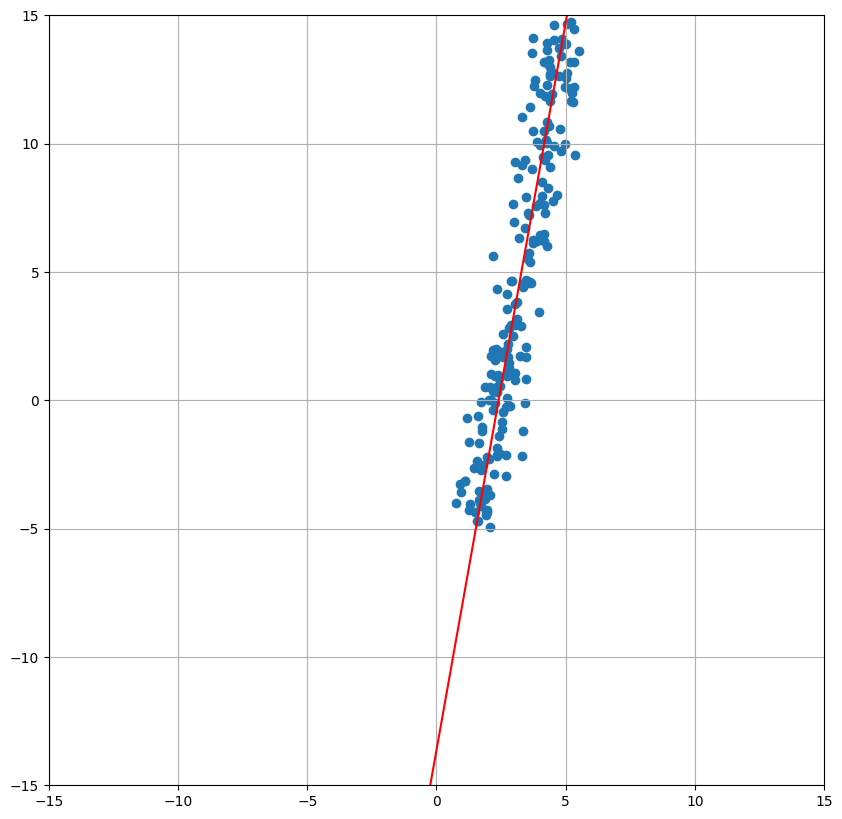

In [7]:
x = data[:,0]
y = data[:,1]

xm = np.mean(x)
ym = np.mean(y)
x2m = np.mean( x**2 )
xym = np.mean( x*y )
y2m = np.mean( y**2 )

A = np.array( [ [x2m - xm*xm , xym - xm*ym],[xym - xm*ym, y2m-ym*ym] ])
print("A=",A)
eigenvals, eigenvecs = np.linalg.eig(A)
print("Eigen values:",eigenvals)
print("Eigen vectors: ",eigenvecs)

params = eigenvecs[:,0]
a = params[0]
b = params[1]
c = -a*xm - b*ym

x0 = -15
x1 = 15
y0 = (-a*x0 - c)/b
y1 = (-a*x1 - c)/b

plt.figure(figsize=(10,10))
plt.scatter( data[:,0], data[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid(True)
plt.plot([x0,x1],[y0,y1], 'r')